In [69]:
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('/content/epicsettingsunigine.csv', skiprows=2)
df.columns
df = df.rename(columns={'04-07-2025 19:25:17': 'Time'})

df.drop(columns='2', inplace=True)
print(df.columns)
df

df["Time"] = pd.to_datetime(df["Time"])
df


Index(['Time', 'GPU temperature', 'GPU usage', 'Framerate', 'BUS usage',
       'Memory usage', 'Memory clock', 'Power percent', 'Power', 'Fan speed',
       'No load limit', 'CPU temperature', 'CPU8 usage', 'CPU usage',
       'CPU power', 'RAM usage'],
      dtype='object')


,Time,GPU temperature,GPU usage,Framerate,BUS usage,Memory usage,Memory clock,Power percent,Power,Fan speed,No load limit,CPU temperature,CPU8 usage,CPU usage,CPU power,RAM usage
0,2025-04-07 19:25:17,0,°C,0.0,100,10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-04-07 19:25:17,1,%,0.0,100,10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-04-07 19:25:17,2,FPS,0.0,200,10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-04-07 19:25:17,3,%,0.0,100,10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-04-07 19:25:17,4,MB,0.0,8192,10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2025-04-07 19:27:51,61,7,NaN,1,1439.012,405.0,9.0,15.63,53.0,1.0,72.0,53.033,52.010,75.694,13299.0
170,2025-04-07 19:27:52,60,10,NaN,0,1425.605,405.0,9.0,17.396,52.0,1.0,73.0,21.605,25.311,45.557,13299.0
171,2025-04-07 19:27:53,60,12,NaN,0,1395.211,405.0,9.0,16.483,51.0,1.0,74.0,42.956,35.831,58.093,13317.0
172,2025-04-07 19:27:54,59,12,NaN,0,1387.742,405.0,9.0,17.396,50.0,1.0,65.0,21.667,23.658,43.629,13267.0


In [71]:
cols = ["GPU temperature", "GPU usage", "Framerate", "Memory usage", "CPU power", "RAM usage"]

for col in cols:
  df[col] = pd.to_numeric(df[col], errors='coerce')


df = df.iloc[60:150]

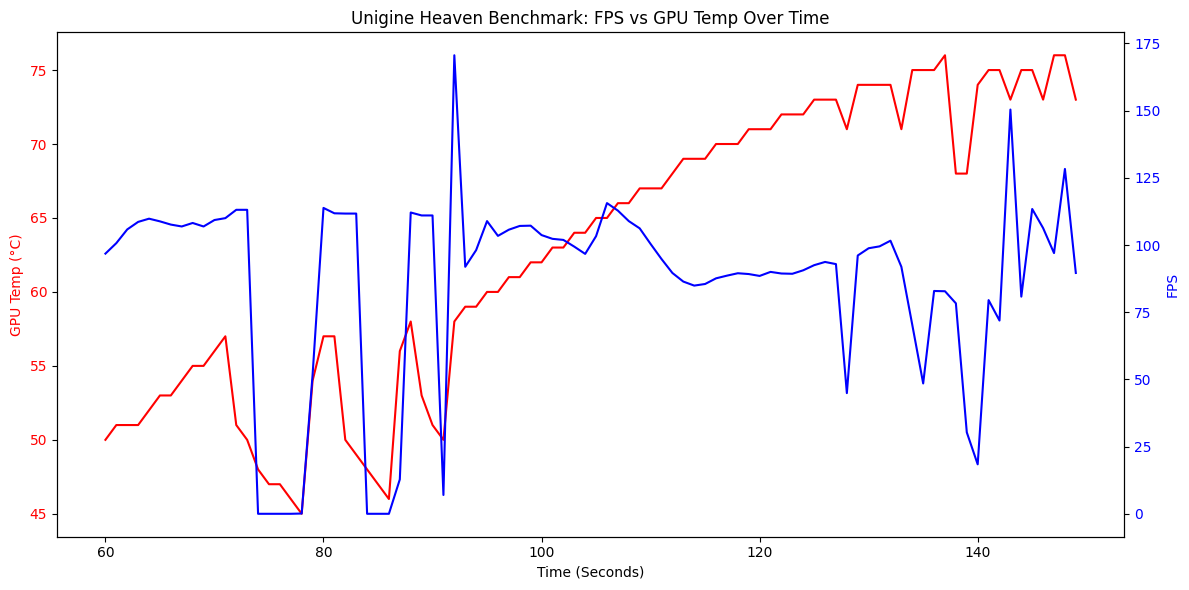

<Figure size 640x480 with 0 Axes>

In [72]:
fig, ax1 = plt.subplots(figsize=(12,6))

# Primary Y: GPU Temp
ax1.set_xlabel("Time (Seconds)")
ax1.set_ylabel("GPU Temp (°C)", color='red')
ax1.plot(df["GPU temperature"], color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Secondary Y: FPS
ax2 = ax1.twinx()
ax2.set_ylabel("FPS", color='blue')
ax2.plot(df["Framerate"], color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title("Unigine Heaven Benchmark: FPS vs GPU Temp Over Time")
fig.tight_layout()
plt.savefig("minecraft_nortx_fps_vs_temp_dualaxis.png")
plt.show()
plt.savefig("minecraft_nortx_fps_vs_temp_dualaxis.png")
